#### Notebook for sub-clustering myeloid cells from *GSE217517* to then overlay my mregDC sig.

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE217517')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE217517"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
#Load in previously exported myeloid cells
myeloid_HGSOC <- readRDS("/scratch/user/s4436039/scdata/GSE217517/GSE217517_myeloid.RDS")

In [4]:
myeloid_HGSOC
head(myeloid_HGSOC)
tail(myeloid_HGSOC)

An object of class Seurat 
36601 features across 8457 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 17 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, scale.data
 2 dimensional reductions calculated: pca, umap

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id,percent.mt,RNA_snn_res.0.5,seurat_clusters,RNA_snn_res.0.2
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>
GSE217517_pt1_AAACGAAAGAACCCGA-1,GSE217517,7268,2217,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,3.769950,9,1,1
GSE217517_pt1_AAAGAACCAGGGCTTC-1,GSE217517,20132,4339,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,7.634612,5,1,1
GSE217517_pt1_AAAGAACTCCATGAGT-1,GSE217517,4183,1410,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,35.142242,9,1,1
GSE217517_pt1_AAAGGATTCTATTTCG-1,GSE217517,3037,1274,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,6.914718,9,1,1
GSE217517_pt1_AAATGGACACTGAGGA-1,GSE217517,9516,2822,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,2.847835,5,1,1
GSE217517_pt1_AACAGGGGTCATCGGC-1,GSE217517,22104,4611,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,7.695440,9,1,1
GSE217517_pt1_AACCAACGTAGTTAGA-1,GSE217517,8886,2757,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,6.549629,9,1,1
GSE217517_pt1_AACCAACTCCGAAATC-1,GSE217517,12902,3627,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,11.052550,5,1,1
GSE217517_pt1_AACCATGTCCGGGACT-1,GSE217517,18964,4462,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,2.858047,9,1,1


,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id,percent.mt,RNA_snn_res.0.5,seurat_clusters,RNA_snn_res.0.2
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>
GSE217517_pt8_TTCTTGAGTCTCGGGT-1,GSE217517,13982,3118,tumour,HGSOC,pt8,GSE217517_HGSOC_pt8,4.7060506,5,1,1
GSE217517_pt8_TTGAACGCAAACTCTG-1,GSE217517,2811,823,tumour,HGSOC,pt8,GSE217517_HGSOC_pt8,0.4268943,5,1,1
GSE217517_pt8_TTGGGATCAATCGAAA-1,GSE217517,24744,3970,tumour,HGSOC,pt8,GSE217517_HGSOC_pt8,23.3268671,5,1,1
GSE217517_pt8_TTGGGATCACTGTCCT-1,GSE217517,14280,4129,tumour,HGSOC,pt8,GSE217517_HGSOC_pt8,12.9481793,5,1,1
GSE217517_pt8_TTGTGTTTCCTGGGTG-1,GSE217517,7817,2288,tumour,HGSOC,pt8,GSE217517_HGSOC_pt8,8.8013304,5,1,1
GSE217517_pt8_TTTACCAGTATCATGC-1,GSE217517,11685,2182,tumour,HGSOC,pt8,GSE217517_HGSOC_pt8,5.6311510,5,1,1
GSE217517_pt8_TTTAGTCTCGCCTATC-1,GSE217517,1355,498,tumour,HGSOC,pt8,GSE217517_HGSOC_pt8,6.7158672,5,1,1
GSE217517_pt8_TTTGACTAGTGATGGC-1,GSE217517,10569,2740,tumour,HGSOC,pt8,GSE217517_HGSOC_pt8,6.1500615,5,1,1
GSE217517_pt8_TTTGGTTCACACGCCA-1,GSE217517,10255,2375,tumour,HGSOC,pt8,GSE217517_HGSOC_pt8,4.0078011,5,1,1


#### Subclustering data
* should I change the number of variable features or anything when doing the subclustering?

In [5]:
#Find variable features
myeloid_HGSOC <- FindVariableFeatures(myeloid_HGSOC, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -1.5902”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.32301”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.0226e-30”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.090619”
Finding variable features for layer counts.7

Finding variable features for layer counts.8



In [6]:
#Scale the data
myeloid_HGSOC <- ScaleData(myeloid_HGSOC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
myeloid_HGSOC <- RunPCA(myeloid_HGSOC, features = VariableFeatures(object = myeloid_HGSOC))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  MAP4K4, CXCL8, EREG, THBS1, STAT4, AQP9, ITGB8, IL1R1, LUCAT1, PID1 
	   BASP1, AC013652.1, VCAN, PDE4D, FCAR, SVIL, PTGS2, TPST1, TRAF1, SEMA3C 
	   TEX14, AZIN1-AS1, FGFR1, CD109, MAMLD1, SDC2, F3, SEMA6B, IL1B, EXT1 
Negative:  PRDX1, TUBA1B, DYNLL1, PSME2, S100A11, CAPG, VAMP8, UQCR10, CD81, PSMB9 
	   YWHAH, TUBB, CALM2, CALR, PPIA, BST2, PSMA4, SSB, CTSZ, IFI6 
	   GSN, JPT1, CTSC, APOC1, PPIB, SPP1, GRN, HSPB1, FABP5, C1QC 
PC_ 2 
Positive:  LYZ, FCN1, S100A9, CD52, S100A8, S100A4, AC020656.1, APOBEC3A, PFN1, CD300E 
	   G0S2, IL1RN, S100A12, IFI30, ACTB, CRIP1, LILRA5, EREG, WARS, C15orf48 
	   VAMP5, PTGS2, THBS1, FBP1, AREG, EEF1B2, MT2A, RPSA, ACTG1, SNHG15 
Negative:  FRMD4A, SPRED1, FMNL2, BNC2, NRP2, PSD3, DST, CADM1, MIR99AHG, TCF4 
	   SLCO2B1, LGMN, EPB41L2, NRP1, FHIT, PLTP, AP2A2, COLEC1

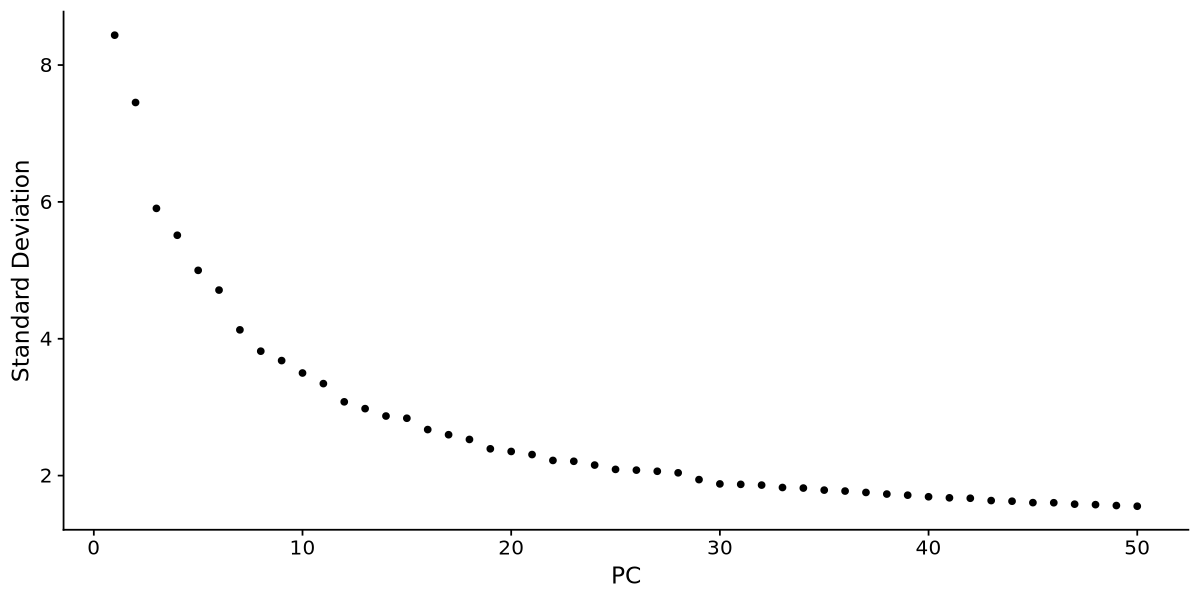

In [7]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(myeloid_HGSOC, ndims=50)
#go with 40 again

In [8]:
#Find neighbours (make sure number matches no. features chosen above)
myeloid_HGSOC <- FindNeighbors(myeloid_HGSOC, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [9]:
#Run UMAP
myeloid_HGSOC <- RunUMAP(myeloid_HGSOC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:12:50 UMAP embedding parameters a = 0.9922 b = 1.112

11:12:50 Read 8457 rows and found 40 numeric columns

11:12:50 Using Annoy for neighbor search, n_neighbors = 30

11:12:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:12:50 Writing NN index file to temp file /scratch/temp/9234841/RtmpVaY9Qo/fileb995b44bbb0ba

11:12:50 Searching Annoy index using 1 thread, search_k = 3000

11:12:52 Annoy recall = 100%

11:12:52 Commencing smooth kNN distance calibration using 1 thread
 with ta

In [10]:
#Cluster, resolution here set to 0.5
myeloid_HGSOC <- FindClusters(myeloid_HGSOC, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8457
Number of edges: 304851

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9043
Number of communities: 15
Elapsed time: 0 seconds


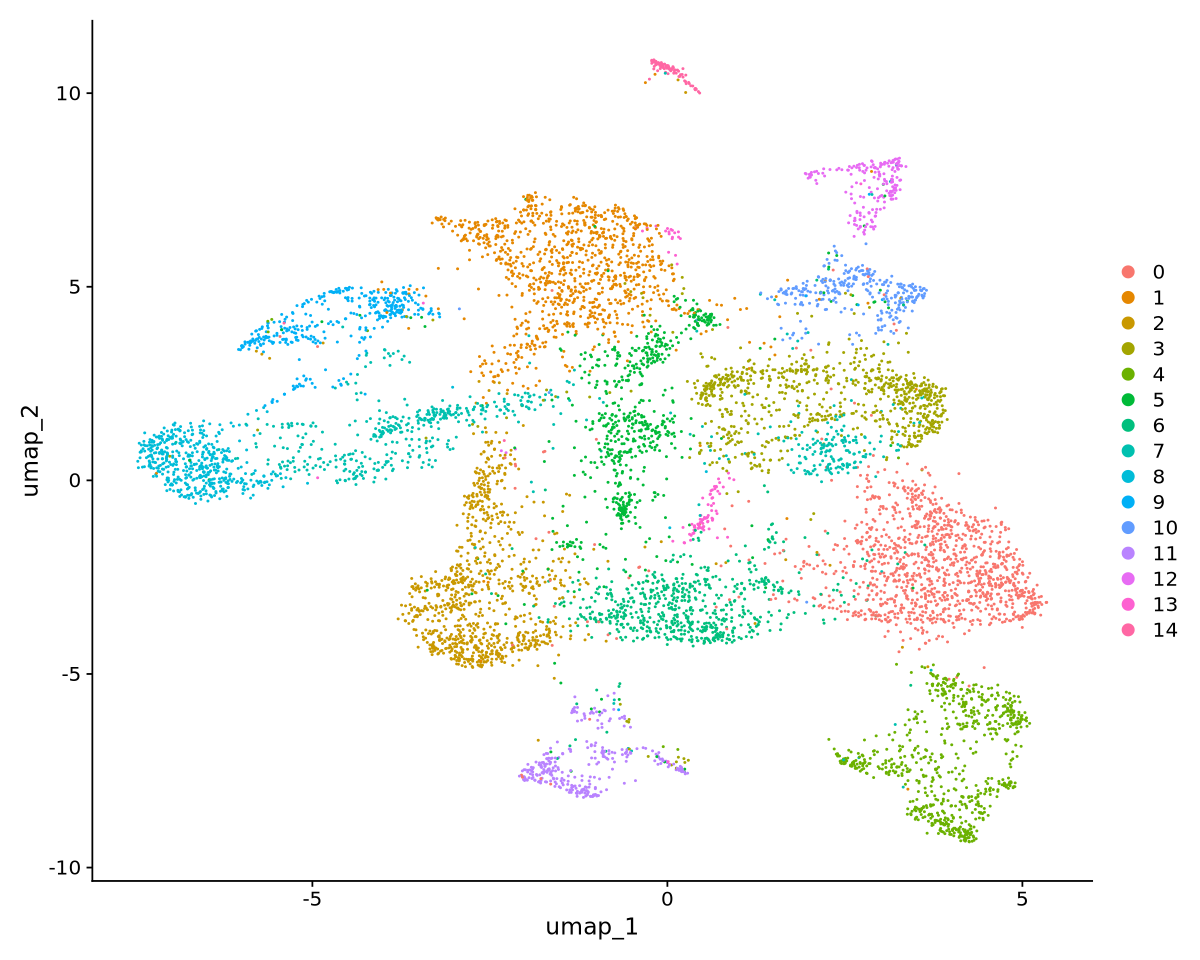

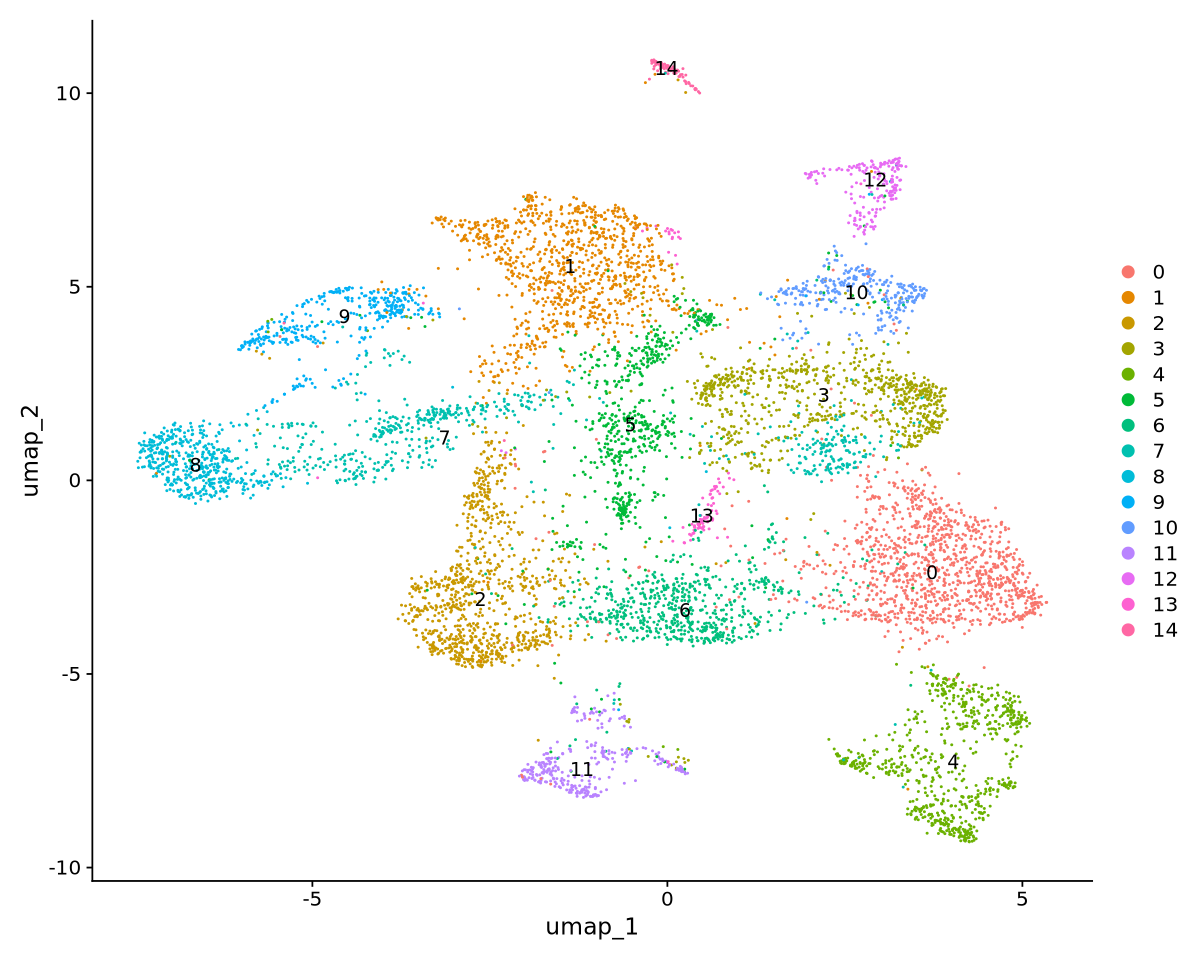

In [11]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(myeloid_HGSOC, reduction = "umap")
DimPlot(myeloid_HGSOC, reduction = "umap", label=TRUE)

In [12]:
#when I ran the line below it said I needed to join layers first, so doing that here.
myeloid_HGSOC <- JoinLayers(myeloid_HGSOC)

In [13]:
myeloid_HGSOC

An object of class Seurat 
36601 features across 8457 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 2 dimensional reductions calculated: pca, umap

In [14]:
library(devtools)
library(presto)

Loading required package: usethis



Loading required package: Rcpp

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [15]:
# find markers for every cluster compared to all remaining cells
myeloid_HGSOC.markers <- FindAllMarkers(myeloid_HGSOC, only.pos = TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14



In [16]:
#report only the positive ones
myeloid_HGSOC.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,2.319329,0.898,0.227,0.000000e+00,0,AC105402.3
0.000000e+00,3.016682,0.819,0.227,0.000000e+00,0,FRMD4A
0.000000e+00,3.710404,0.841,0.308,0.000000e+00,0,SPRED1
0.000000e+00,2.410390,0.825,0.381,0.000000e+00,0,FMNL2
0.000000e+00,2.104681,0.930,0.488,0.000000e+00,0,LRMDA
0.000000e+00,4.290012,0.492,0.059,0.000000e+00,0,KCNQ3
0.000000e+00,2.208831,0.877,0.453,0.000000e+00,0,ABCG1
0.000000e+00,3.034735,0.527,0.104,0.000000e+00,0,BNC2
0.000000e+00,2.172736,0.882,0.471,0.000000e+00,0,LDLRAD4


In [17]:
#top 10 genes for each cluster
top10cluster <- myeloid_HGSOC.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 10) %>%
    ungroup() -> top10

#repeat for top 20
top20cluster <- myeloid_HGSOC.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 20) %>%
    ungroup() -> top20

In [18]:
top10cluster
write.csv(top10cluster,"GSE217517_myeloid_top10cluster.csv") 

top20cluster
write.csv(top20cluster,"GSE217517_myeloid_top20cluster.csv") 

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,2.319329,0.898,0.227,0.000000e+00,0,AC105402.3
0.000000e+00,3.016682,0.819,0.227,0.000000e+00,0,FRMD4A
0.000000e+00,3.710404,0.841,0.308,0.000000e+00,0,SPRED1
0.000000e+00,2.410390,0.825,0.381,0.000000e+00,0,FMNL2
0.000000e+00,2.104681,0.930,0.488,0.000000e+00,0,LRMDA
0.000000e+00,4.290012,0.492,0.059,0.000000e+00,0,KCNQ3
0.000000e+00,2.208831,0.877,0.453,0.000000e+00,0,ABCG1
0.000000e+00,3.034735,0.527,0.104,0.000000e+00,0,BNC2
0.000000e+00,2.172736,0.882,0.471,0.000000e+00,0,LDLRAD4


p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,2.319329,0.898,0.227,0.000000e+00,0,AC105402.3
0.000000e+00,3.016682,0.819,0.227,0.000000e+00,0,FRMD4A
0.000000e+00,3.710404,0.841,0.308,0.000000e+00,0,SPRED1
0.000000e+00,2.410390,0.825,0.381,0.000000e+00,0,FMNL2
0.000000e+00,2.104681,0.930,0.488,0.000000e+00,0,LRMDA
0.000000e+00,4.290012,0.492,0.059,0.000000e+00,0,KCNQ3
0.000000e+00,2.208831,0.877,0.453,0.000000e+00,0,ABCG1
0.000000e+00,3.034735,0.527,0.104,0.000000e+00,0,BNC2
0.000000e+00,2.172736,0.882,0.471,0.000000e+00,0,LDLRAD4


Warning message in DoHeatmap(myeloid_HGSOC, features = top10$gene):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: TUBB2B, HSPA1L, SNX22, PPM1J, HLA-DOB, RBFOX2, AC091173.1, AL391807.1, AL035446.1, SNHG5, HLA-DRB5, HIF1A-AS3, ABCA1, NOCT, CDK14, LINC01619, FNDC3B, LINC01914, KCNJ10, UBD, IGLC3, IGLC1, ZFP36, IGHG4, AL450992.3, PRKCB, PIK3R5, JARID2, TEX41, GPR132, PLCB1, AL138720.1, SMAD3, DOCK4, LDLRAD4, ABCG1, LRMDA, AC105402.3”


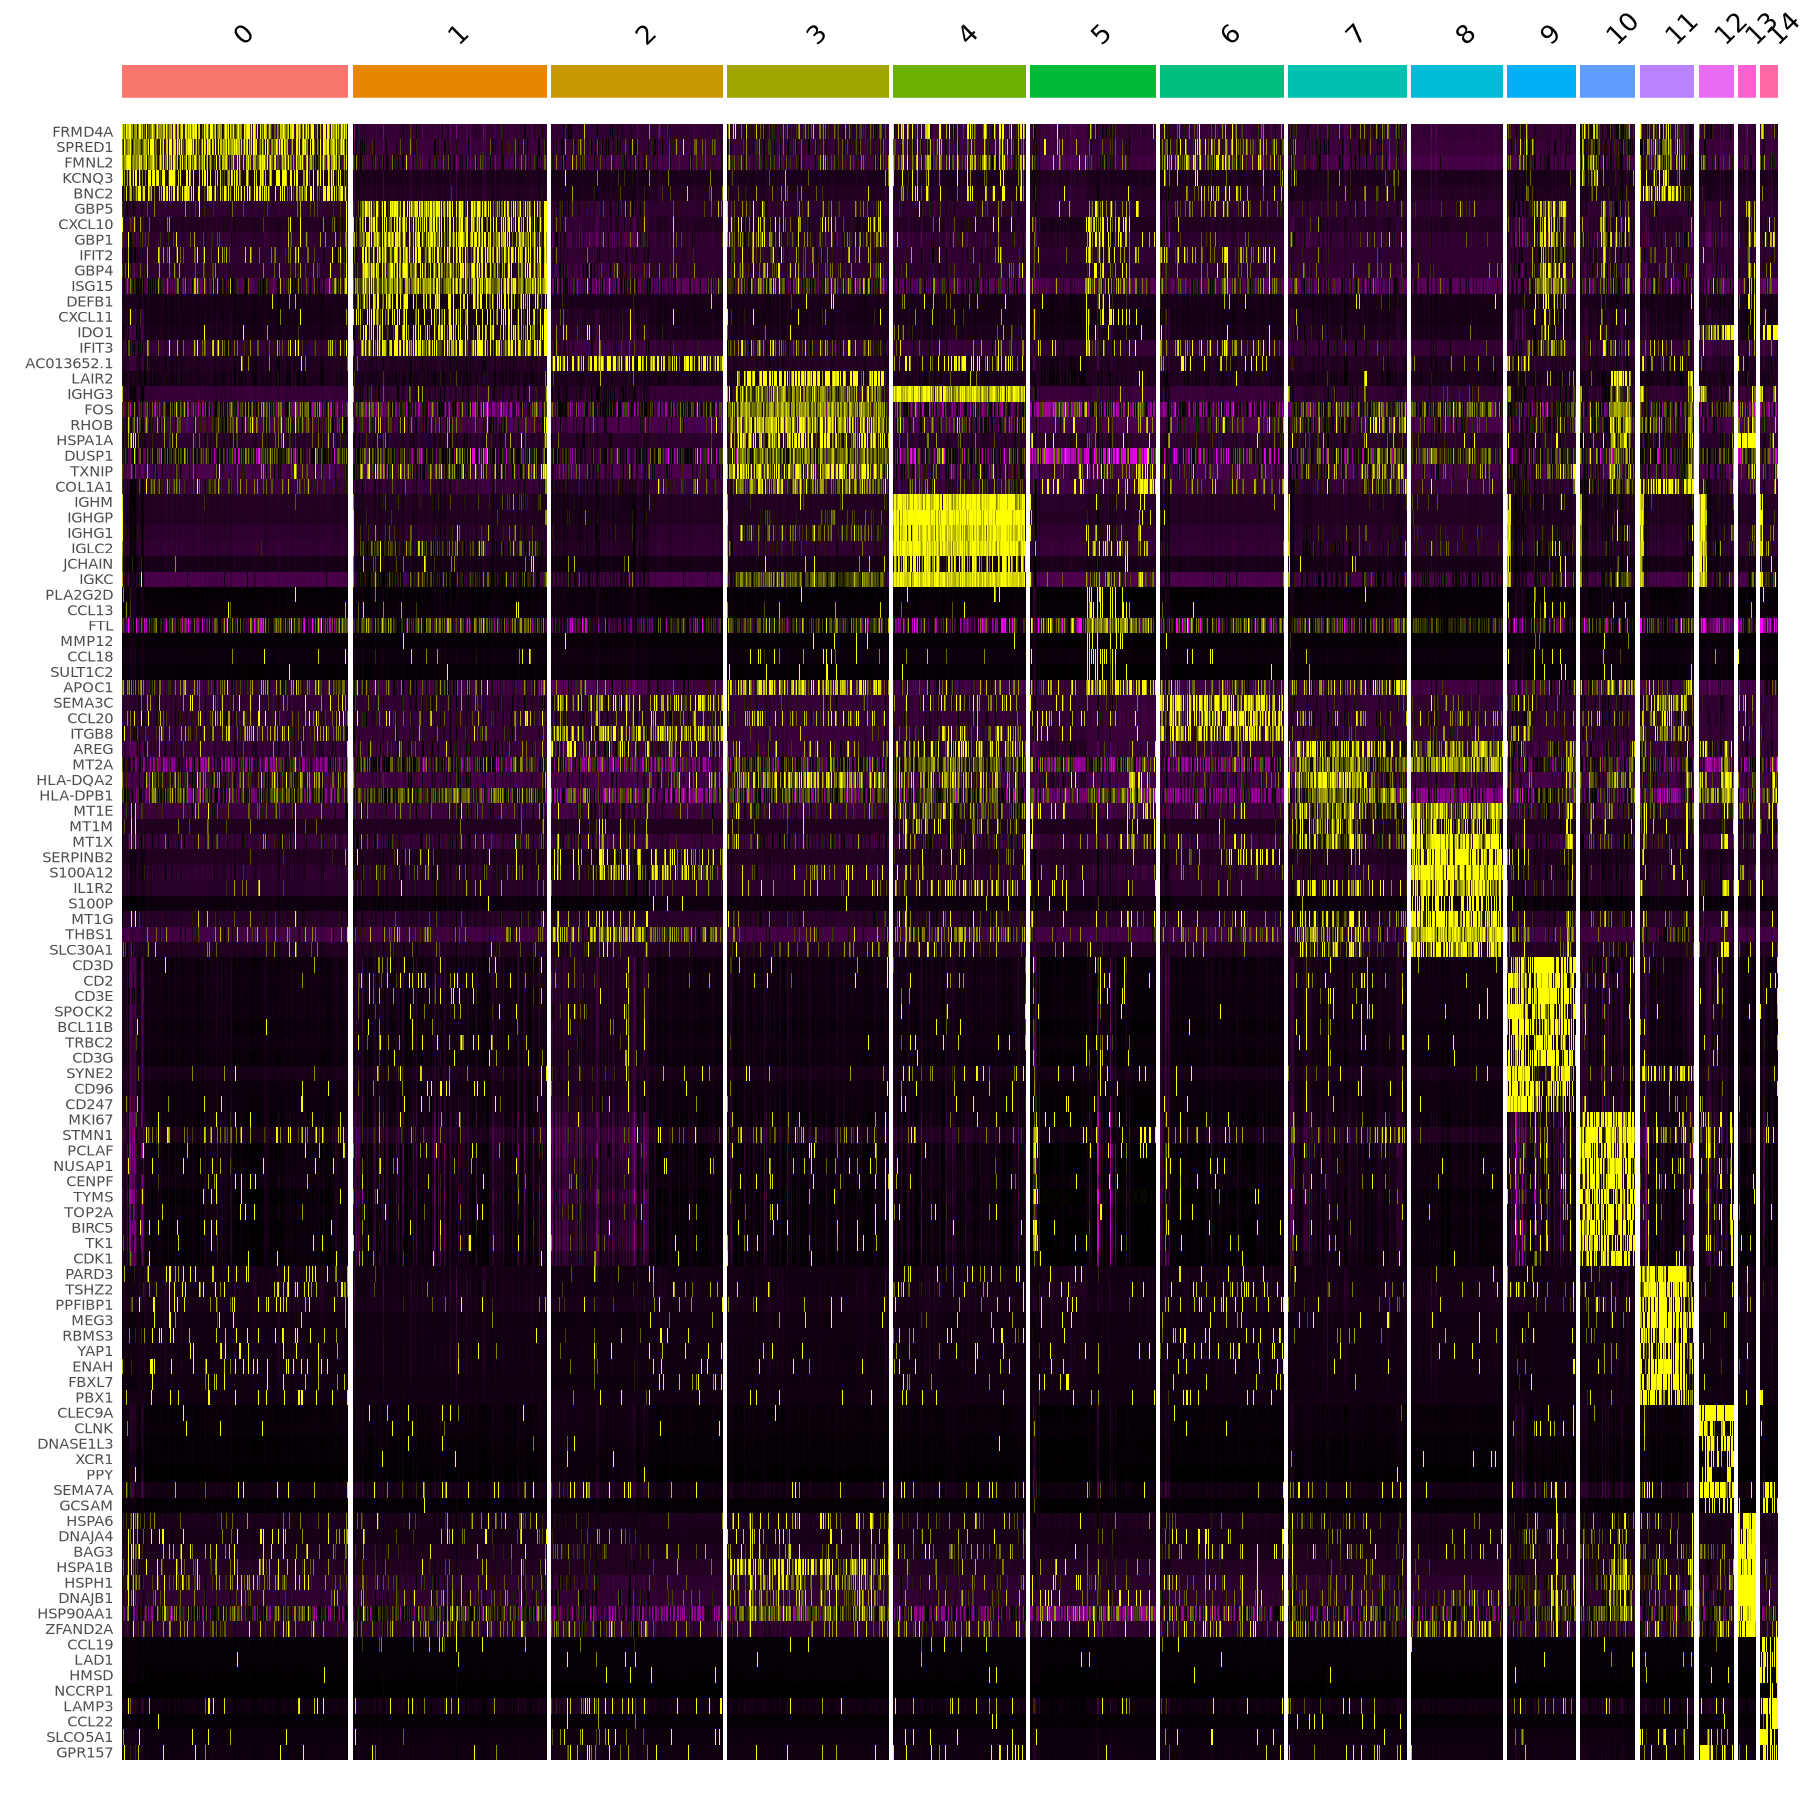

In [19]:
options(repr.plot.height=15, repr.plot.width=15)
myeloid_HGSOC.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 10) %>%
    ungroup() -> top10
DoHeatmap(myeloid_HGSOC, features = top10$gene) + NoLegend()

#### Next annotate cell clusters based on top 20 genes (done manually looking at csv exported above, see i drive for notes)

In [20]:
##add annotation code here

#### using seurat AddModuleScore to see where my mregDC signature is enriched

In [20]:
#make an object with my top 100 DEGs (ag_pos vs Dll1 limma)

sig <- list(c(
  'CCL22',
  'IL4I1',
  'SIRPA',
  'CCR7',
  'CHST11',
  'GPR157',
  'RGS1',
  'BIRC3',
  'TRAF1',
  'CSF2RA',
  'TBC1D13',
  'LAMP3',
  'MREG',
  'PPP1R14A',
  'SPRED2',
  'CD83',
  'TXN',
  'MOB3A',
  'NFKB1',
  'TBC1D4',
  'CDK2',
  'WFDC21P',
  'ARAP2',
  'ZER1',
  'ACSL1',
  'SPINT2',
  'SQSTM1',
  'TBC1D8',
  'JAG1',
  'AC073508.3',
  'BATF',
  'ETV3',
  'BCL2',
  'KIF2A',
  'FSCN1',
  'TNFAIP3',
  'CCDC28B',
  'NR4A3',
  'CYTIP',
  'PLEK',
  'FOXO1',
  'TOMM34',
  'TRAFD1',
  'PPP1R16B',
  'CXCR4',
  'CD40',
  'ENTPD7',
  'CDKN1A',
  'BID',
  'MARCKS',
  'DUSP5',
  'MAP4K4',
  'BCL2L1',
  'ISG20',
  'RNF145',
  'RNF121',
  'GPR132',
  'RASGEF1B',
  'CYRIA',
  'RAB10',
  'CERS6',
  'IL1R1',
  'STK4',
  'CLEC2D',
  'AL390719.1',
  'ZBTB38',
  'IFNGR2',
  'CD274',
  'SLC41A2',
  'NRP2',
  'ANKRD33B',
  'GPR183',
  'POGLUT1',
  'ADORA2A',
  'JADE3',
  'KHDRBS3',
  'CTNNB1',
  'SLCO5A1',
  'NFKB2',
  'RGS2',
  'SEC61B',
  'ZNRF1',
  'RELB',
  'C12orf45',
  'IRF2',
  'EPOP',
  'MXD1',
  'RAB5B',
  'PADI2',
  'DRAM1',
  'MTMR4',
  'EEF2K',
  'GCNT2',
  'RAPH1',
  'BCL2A1',
  'SEC23B',
  'PIM3',
  'ANTXR2',
  'ABTB2',
  'TMEM200A'
))

In [21]:
#calculate module score
myeloid_HGSOC <- AddModuleScore(
  object = myeloid_HGSOC,
  features = sig,
  name = "Sig_enriched"
)

Warning message:
“The following features are not present in the object: WFDC21P, CYRIA, AL390719.1, not searching for symbol synonyms”


In [22]:
head(myeloid_HGSOC@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id,percent.mt,RNA_snn_res.0.5,seurat_clusters,RNA_snn_res.0.2,Sig_enriched1
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>
GSE217517_pt1_AAACGAAAGAACCCGA-1,GSE217517,7268,2217,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,3.769950,4,4,1,0.31357522
GSE217517_pt1_AAAGAACCAGGGCTTC-1,GSE217517,20132,4339,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,7.634612,12,12,1,0.17496632
GSE217517_pt1_AAAGAACTCCATGAGT-1,GSE217517,4183,1410,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,35.142242,4,4,1,0.07645370
GSE217517_pt1_AAAGGATTCTATTTCG-1,GSE217517,3037,1274,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,6.914718,4,4,1,0.20400604
GSE217517_pt1_AAATGGACACTGAGGA-1,GSE217517,9516,2822,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,2.847835,12,12,1,0.06750195
GSE217517_pt1_AACAGGGGTCATCGGC-1,GSE217517,22104,4611,tumour,HGSOC,pt1,GSE217517_HGSOC_pt1,7.695440,4,4,1,0.23549840


In [23]:
library(ggplot2)
library(RColorBrewer)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


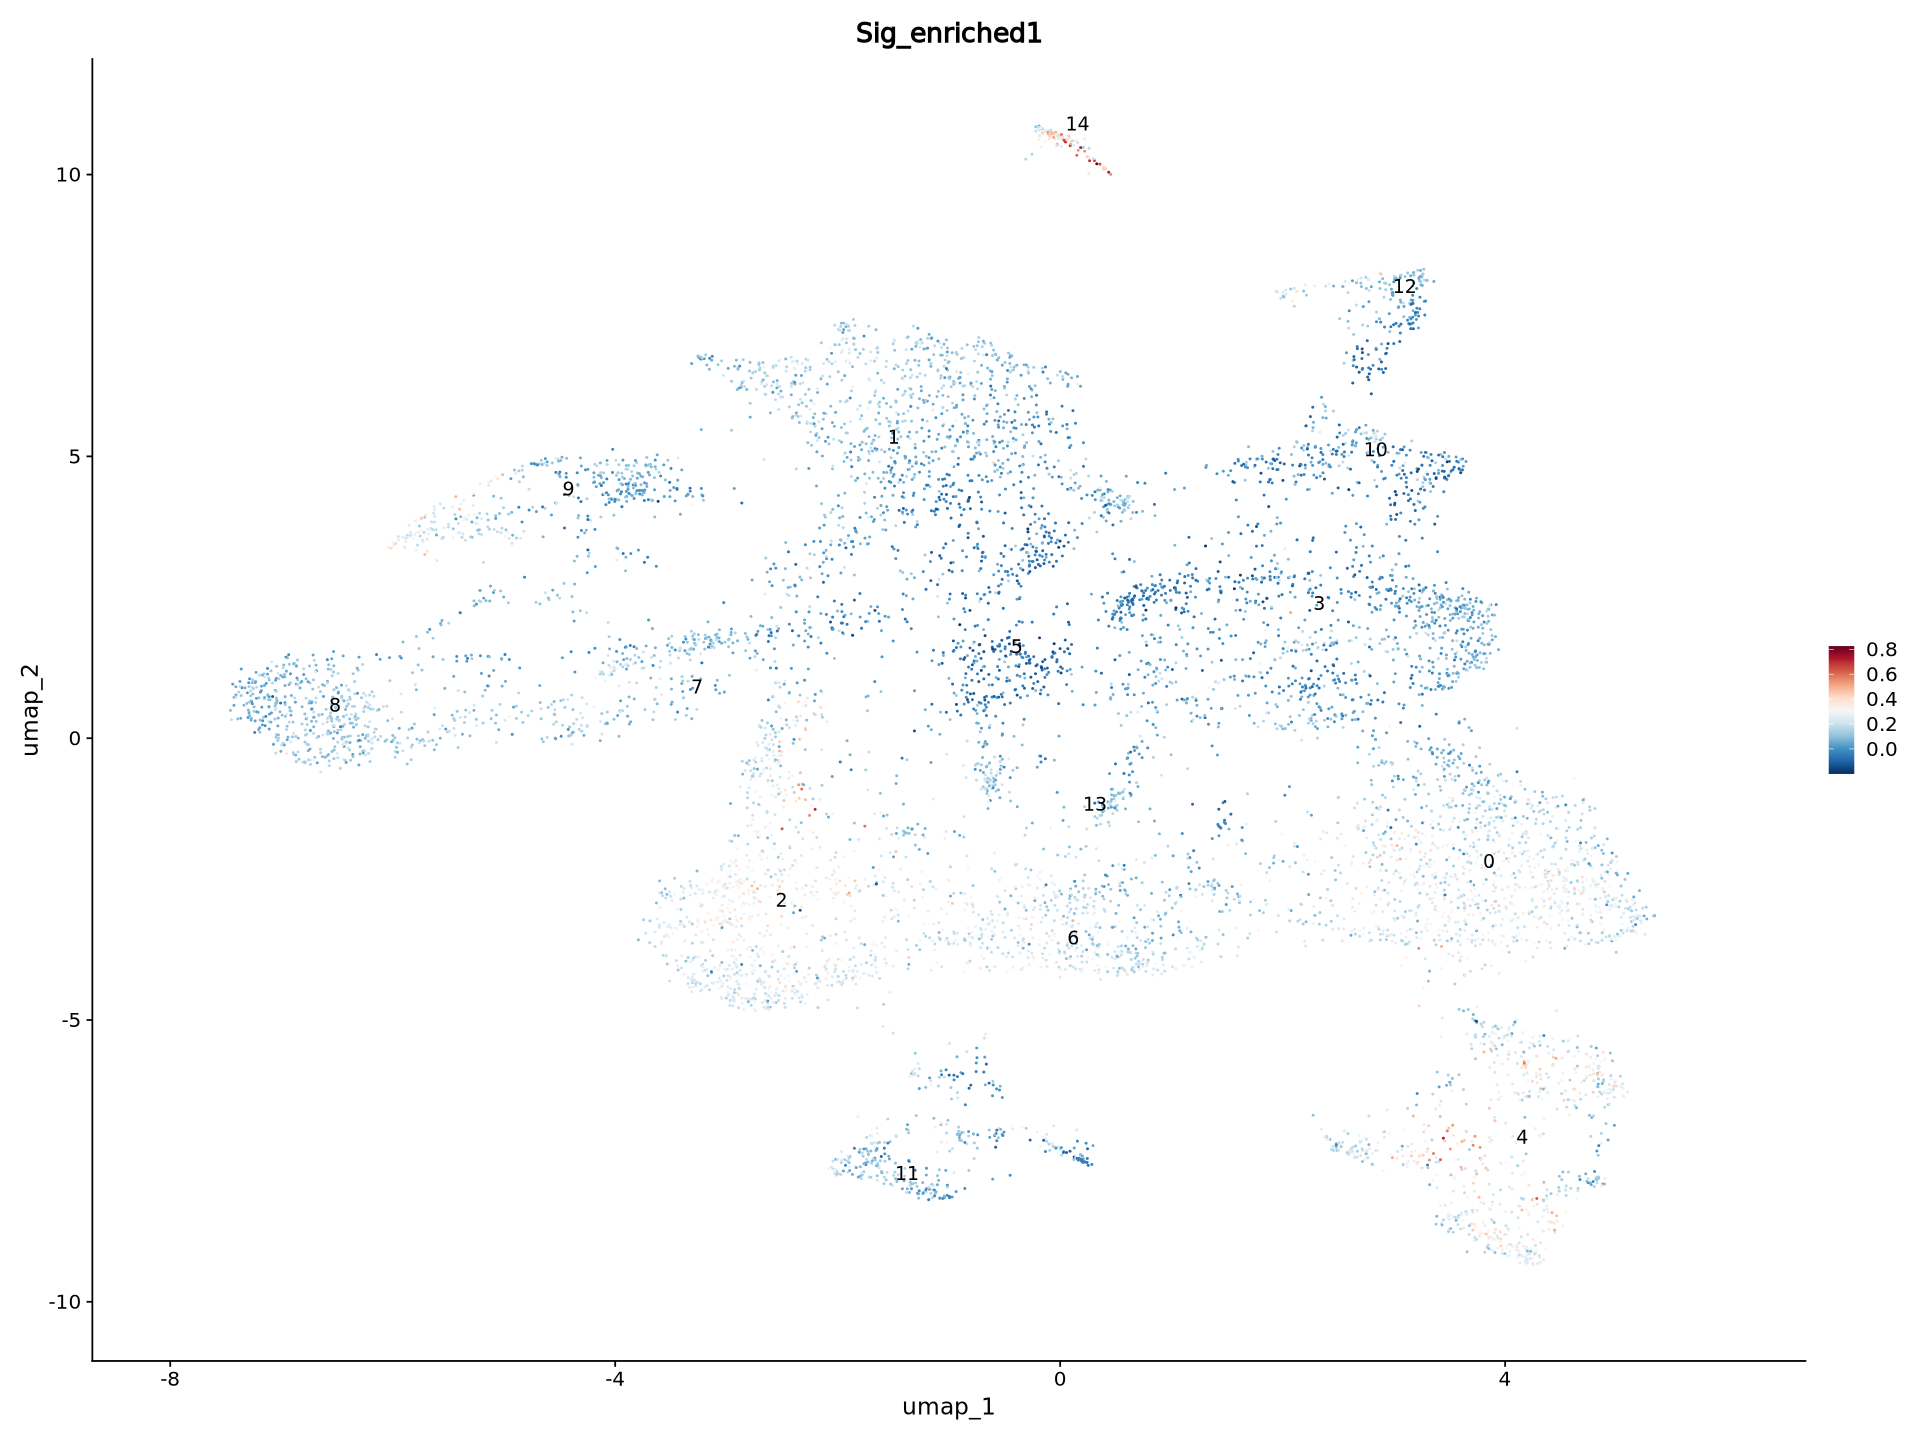

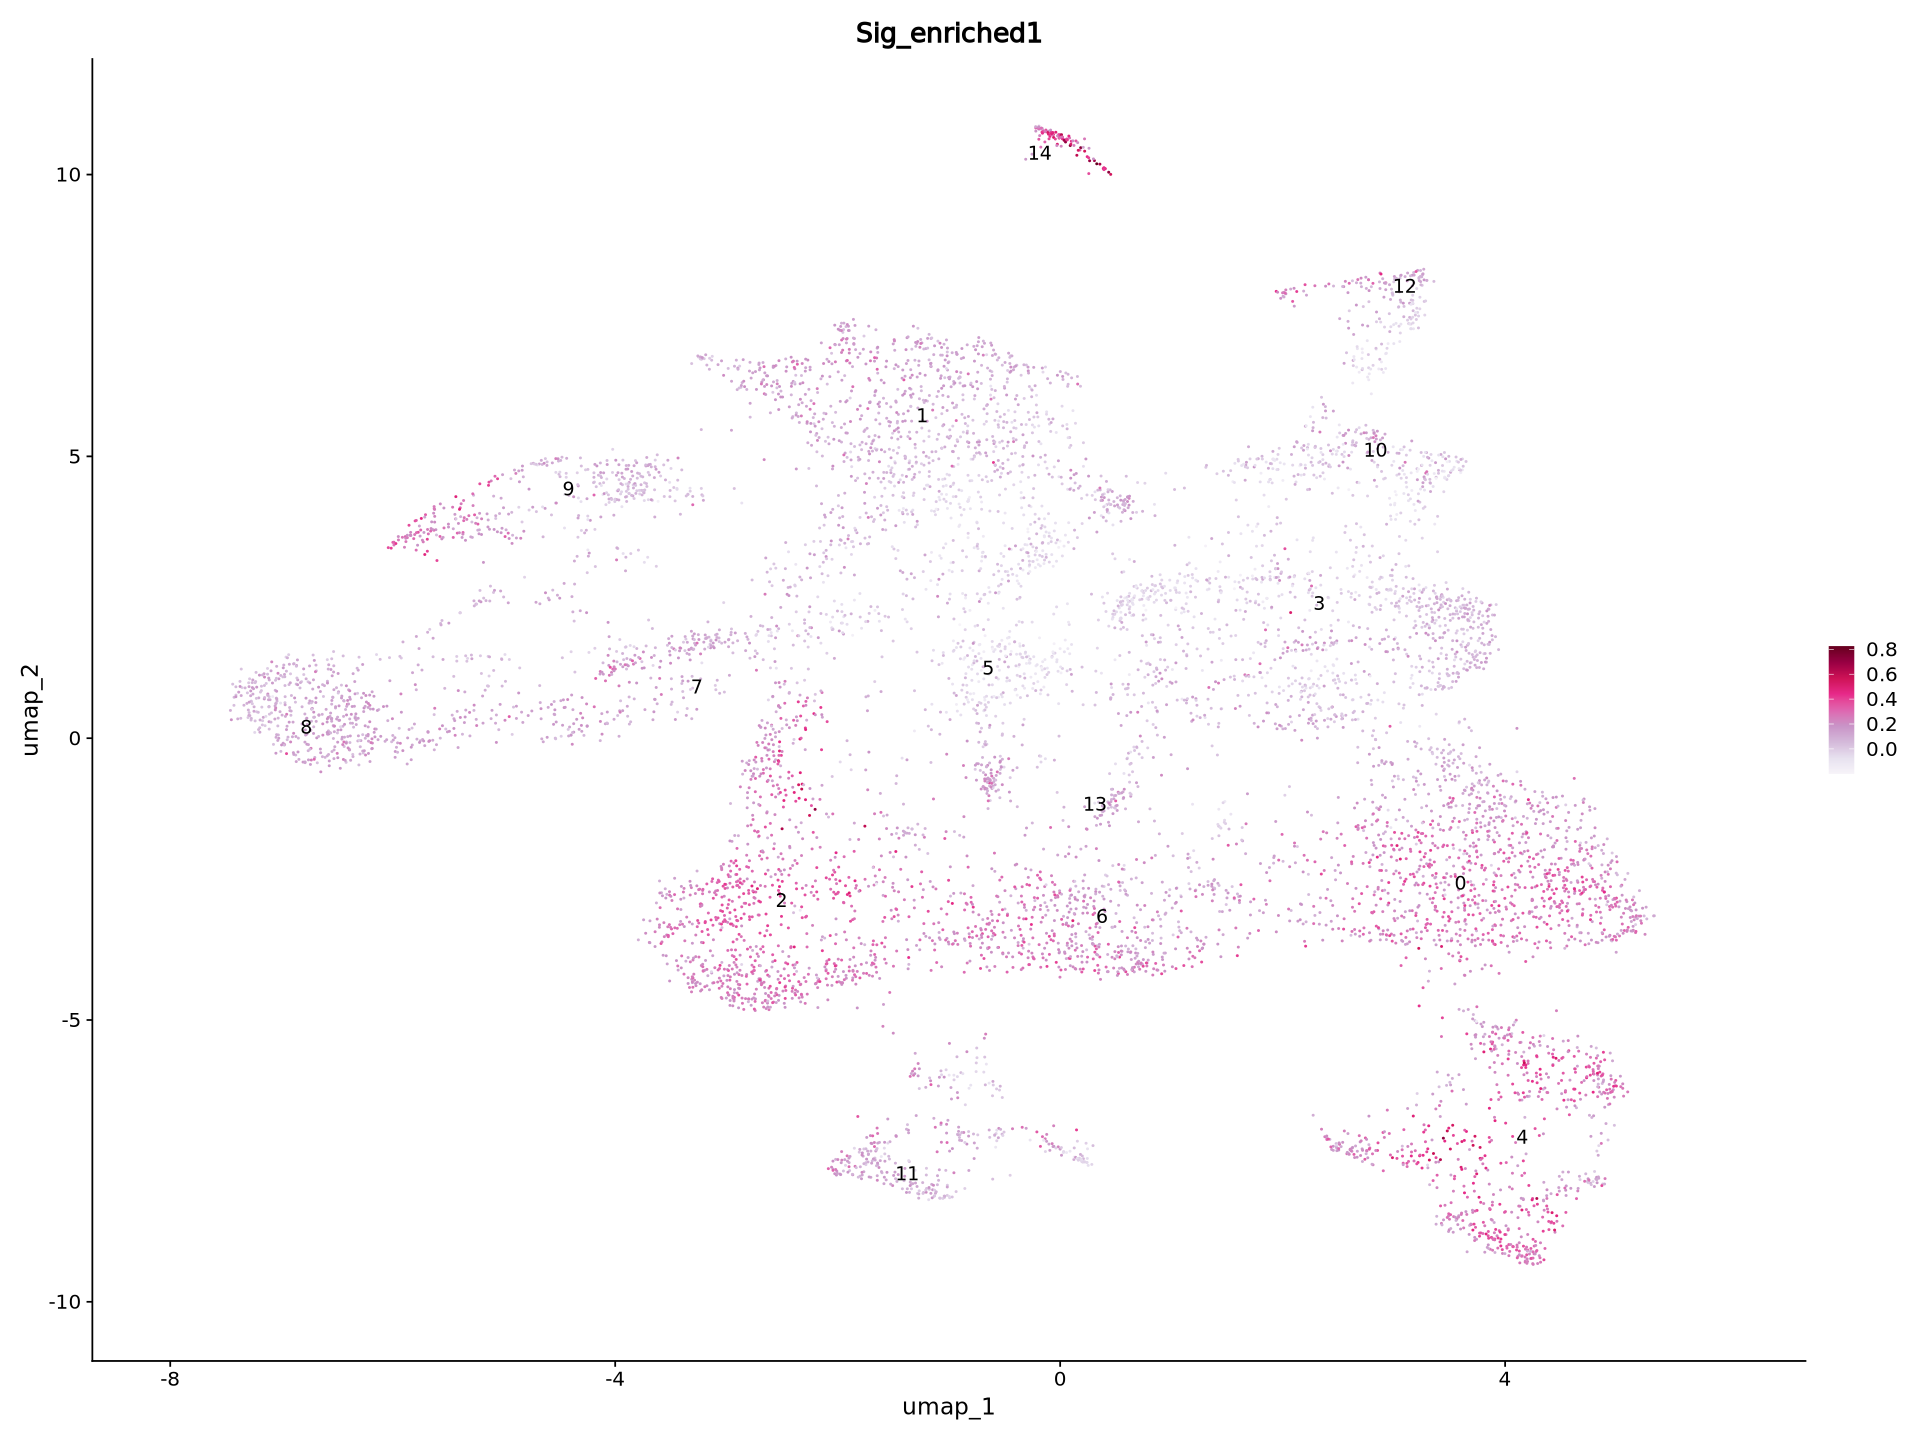

In [36]:
#Plot UMAP with module score
options(repr.plot.height=12, repr.plot.width=16)

FeaturePlot(myeloid_HGSOC,
            features = "Sig_enriched1", label = TRUE, repel = TRUE) +
            scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu")))

FeaturePlot(myeloid_HGSOC,
            features = "Sig_enriched1", label = TRUE, repel = TRUE) +
            scale_colour_gradientn(colours = brewer.pal(n = 9, name = "PuRd"))

#### Repeating with AUCell

In [37]:
library(AUCell)

In [38]:
#calculate rankings for each cell
cells_rankings <- AUCell.buildRankings(myeloid_HNSCC, nCores=1, plotStats=TRUE)

ERROR: Error in AUCell.buildRankings(myeloid_HNSCC, nCores = 1, plotStats = TRUE): could not find function "AUCell.buildRankings"


In [35]:
# Calculate enrichment scores
myeloid_HNSCC <- RunAUCell(myeloid_HNSCC, sig)

ERROR: Error in RunAUCell(myeloid_HNSCC, sig): could not find function "RunAUCell"


In [ ]:
head(myeloid_HNSCC@meta.data)

In [ ]:
#Plot UMAP with module score
options(repr.plot.height=12, repr.plot.width=16)

FeaturePlot(myeloid_HNSCC,
            features = "Sig_enriched1", label = TRUE, repel = TRUE) +
            scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu")))